In [2]:
using FASTX
using BioSequences
using StatsBase
using DataFrames
using CSV
using Distributions
using Plots
using Random
using PlotlyJS

cd("C://Users//PH//OneDrive - KU Leuven//PhD//Polymerase_Landscape_Mapping//07_Additional_Projects//Phi29//Thumb_1DEL_followup//03_Analysis//06_InDel_Quant")

In [3]:
# Unique ID sequences that mark start and end of each indel loop library
exo_seq1 = dna"TTTGAAACCACC"
exo_seq2 = dna"ATTGAAGATCAC" 
#Amplicon: 45bp, 15amino acids

tpr2_seq1 = dna"GGTAAAGTTCCT"
tpr2_seq2 = dna"GAAACCAAAGAT"
#Amplicon: 45bp, 15amino acids

thumb_seq1 = dna"AGCCGTAAAATG"
thumb_seq2 = dna"GATACCTTTACG"
#Amplicon: 45bp, 15amino acids

12nt DNA Sequence:
GATACCTTTACG

In [4]:
# Loading FASTA file
function load_fasta_file(file_name::String)
    seqs = []
    reader = open(FASTA.Reader, file_name)
    for record in reader
        seq = FASTX.FASTA.sequence(record)
        push!(seqs, seq)
    end
    close(reader)
    return seqs
end

# Finding library region based on IDs
function find_and_trim(data, ID1, ID2)
    seqs = []
    for i in 1:length(data)
        pos1 = findfirst(ExactSearchQuery(ID1), data[i])
        pos2 = findfirst(ExactSearchQuery(ID2), data[i])
        if isnothing(pos1) || isnothing(pos2)
            continue
        end    
        trimmed_seq = data[i][pos1.stop+1:pos2.start-1]
        push!(seqs,trimmed_seq)
    end
        
    return seqs
end

# Transating to protein, ignoring sequences with frameshifts
function dna_2_aa(DNA_seqs)
    aa_seqs = []
    for i in 1:length(DNA_seqs)
        rna_seq = convert(LongRNA{2}, DNA_seqs[i])
        if length(rna_seq) % 3 == 0
            push!(aa_seqs,BioSequences.translate(rna_seq, allow_ambiguous_codons=true, alternative_start=false))    
        end
    end
    return aa_seqs
end

dna_2_aa (generic function with 1 method)

In [5]:
#EX0
exo_R0 =load_fasta_file("01_Datasets\\02_Preprocessed\\EXO-R0.fasta")
exo_R1 =load_fasta_file("01_Datasets\\02_Preprocessed\\EXO-R1.fasta")
exo_R0aa = dna_2_aa(find_and_trim(exo_R0, exo_seq1,exo_seq2))
exo_R1aa = dna_2_aa(find_and_trim(exo_R1, exo_seq1,exo_seq2))

#TPR2
tpr2_R0 =load_fasta_file("01_Datasets\\02_Preprocessed\\TPR2-R0.fasta")
tpr2_R1 =load_fasta_file("01_Datasets\\02_Preprocessed\\TPR2-R1.fasta")
tpr2_R0aa = dna_2_aa(find_and_trim(tpr2_R0, tpr2_seq1,tpr2_seq2))
tpr2_R1aa = dna_2_aa(find_and_trim(tpr2_R1, tpr2_seq1,tpr2_seq2))

#Thumb
thumb_R0 =load_fasta_file("01_Datasets\\02_Preprocessed\\thumb-R0.fasta")
thumb_R1 =load_fasta_file("01_Datasets\\02_Preprocessed\\thumb-R1.fasta")
thumb_R0aa = dna_2_aa(find_and_trim(thumb_R0, thumb_seq1,thumb_seq2))
thumb_R1aa = dna_2_aa(find_and_trim(thumb_R1, thumb_seq1,thumb_seq2))

46907-element Vector{Any}:
 KPKPVQVGVVLVD
 KPKPVQVVLVD
 KPKPVQVVLVD
 KPKPVQVWTGPGGVVLVD
 KPKPVQVVLVD
 KPKPVQVGVVLVD
 KPKPVQVVVLVD
 KPKPVQVVVLVD
 KPKPVQVVLVD
 KPKPVQVVVLVD
 ⋮
 KPKPVQVVVLVD
 KPKPVQVTRVPGGVVLVD
 KPKPVQVVLVD
 KPKPVQVVVLVD
 KPKPVQVGVVLVD
 KPKPVQVHVGPGGVVLVD
 KPKPVQVGVVLVD
 KPKPVQV*LEPGGVVLVD
 KPKPVQVVVLVD

In [90]:
# Finding sequences that appear pre- and post-selection
function find_matches(r0,r1,lib_name)
    total_r0 = length(r0)
    total_r1 = length(r1)
    matches_flattened = intersect(r0,r1)
    r0_matches = []
    for i in 1:length(r0)
        if r0[i] in matches_flattened
            push!(r0_matches,r0[i])
        end
    end
    r1_matches = []
    for i in 1:length(r1)
        if r1[i] in matches_flattened
            push!(r1_matches,r1[i])
        end
    end   
    print(lib_name,":","matches_flattened= ",length(matches_flattened),", ","total_matches_r0= ",length(r0_matches),"/",total_r0,", ","total_matches_r1= ",length(r1_matches),"/",total_r1)
end

exo_matches = find_matches(exo_R0aa,exo_R1aa,"exo")
tpr2_matches = find_matches(tpr2_R0aa,tpr2_R1aa,"tpr2")
thumb_matches = find_matches(thumb_R0aa,thumb_R1aa,"thumb")

### RESULTS
# exo: matches_flattened= 1414, total_matches_r0= 22299/32402, total_matches_r1= 4150/4544
# tpr2: matches_flattened= 1353, total_matches_r0= 74144/75695, total_matches_r1= 71630/73519
# thumb: matches_flattened= 2452, total_matches_r0= 33424/35849, total_matches_r1= 43767/46907

exo:matches_flattened= 1414, total_matches_r0= 22299/32402, total_matches_r1= 4150/4544tpr2:matches_flattened= 1353, total_matches_r0= 74144/75695, total_matches_r1= 71630/73519thumb:matches_flattened= 2452, total_matches_r0= 33424/35849, total_matches_r1= 43767/46907

In [102]:
# Finding sequences that appear ONLY pre- OR post-selection

function find_unique(r0,r1,lib_name)
    total_r0 = length(r0)
    total_r1 = length(r1)
    unique_r0_flattened = setdiff(r0,r1)
    unique_r1_flattened = setdiff(r1,r0)

    unique_r0 = []
    for i in 1:length(r0)
        if r0[i] in unique_r0_flattened
            push!(unique_r0,r0[i])
        end
    end
    unique_r1 = []
    for i in 1:length(r1)
        if r1[i] in unique_r1_flattened
            push!(unique_r1,r1[i])
        end
    end
    max_count_r0 = maximum(collect(values(countmap(unique_r0))))
    avg_count_r0 = round(mean(collect(values(countmap(unique_r0)))); digits = 2)
    max_count_r1 = maximum(collect(values(countmap(unique_r1))))
    avg_count_r1 = round(mean(collect(values(countmap(unique_r1)))); digits = 2)

    print(lib_name,":","unique_r0_flattened= ",length(unique_r0_flattened),", ","unique_r0= ",length(unique_r0),"/",total_r0,", ","unique_r1_flattened= ",length(unique_r1_flattened),", ","unique_r1= ",length(unique_r1),"/",total_r1,", ","(","max_count_r0=",max_count_r0,", ","avg_count_r0=",avg_count_r0,", ","max_count_r1=",max_count_r1,", ","avg_count_r1=",avg_count_r1,")")
end

exo_unique = find_unique(exo_R0aa,exo_R1aa,"exo")
tpr2_unique = find_unique(tpr2_R0aa,tpr2_R1aa,"tpr2")
thumb_unique = find_unique(thumb_R0aa,thumb_R1aa,"thumb")

### RESULTS
# exo:unique_r0_flattened= 4903, unique_r0= 10103/32402, unique_r1_flattened= 364, unique_r1= 394/4544, (max_count_r0=28, avg_count_r0=2.06, max_count_r1=3, avg_count_r1=1.08)
# tpr2:unique_r0_flattened= 1246, unique_r0= 1551/75695, unique_r1_flattened= 1138, unique_r1= 1889/73519, (max_count_r0=7, avg_count_r0=1.24, max_count_r1=12, avg_count_r1=1.66)
# thumb:unique_r0_flattened= 1909, unique_r0= 2425/35849, unique_r1_flattened= 1931, unique_r1= 3140/46907, (max_count_r0=8, avg_count_r0=1.27, max_count_r1=11, avg_count_r1=1.63)


exo:unique_r0_flattened= 4903, unique_r0= 10103/32402, unique_r1_flattened= 364, unique_r1= 394/4544, (max_count_r0=28, avg_count_r0=2.06, max_count_r1=3, avg_count_r1=1.08)tpr2:unique_r0_flattened= 1246, unique_r0= 1551/75695, unique_r1_flattened= 1138, unique_r1= 1889/73519, (max_count_r0=7, avg_count_r0=1.24, max_count_r1=12, avg_count_r1=1.66)thumb:unique_r0_flattened= 1909, unique_r0= 2425/35849, unique_r1_flattened= 1931, unique_r1= 3140/46907, (max_count_r0=8, avg_count_r0=1.27, max_count_r1=11, avg_count_r1=1.63)

Quantifying unique InDels and their enrichment through selection
    The following code calculates different scores to analyse the effectiveness of selection and identify significantly enriched variants with potentially 
    enhanced XNA synthesis activity.

1. Frequency: counts are divided by the total number of protein sequences

    freq = Counts_R0/total_counts

2. Enrichment: Enrichment of each protein sequence through selection

    enrichment = log(frequency_R1/frequency_R0)

3. Enrichment_complex: this score takes into consideration the frequency of sequences before and after selection as well their joint counts to fish out the highly represented/abundant sequences 

    EC = (frequency_R1 - frequency_R0)x((counts_R0 + counts_R1)/2)

4. Statistical E-test: This adapts Andrew Leifer's MATLAB code to implement Krishnamoorty's E-test [Source: Krishnamoorthy, K and Thomson, J. (2004). 
   A more powerful test for comparing two Poisson means. Journal of Statistical Planning and Inference, 119, 249-267].
   Computes the p-value of the unconditional test for testingone and two-sided hypotheses about the means of two Poisson distributions.
        
        INPUT:
        
        iside = side of the test; true for right-sided, false for two-sided 

        alpha = nominal level of the test 

        ki = count of the ith population, i = 1,2 

        ni = sample size from the ith population, i=1,2 

        d = the difference mean1 - mean2 under the H0
        
        OUTPUT: 

        p-value = p-value of the unconditional test


In [8]:

function indel_classification(aa_seqs,wt_length)
    output=[]
    total = length(aa_seqs)
    unique_counts = countmap(aa_seqs)
    for (keys,vals) in unique_counts
        size = length(keys) - wt_length
        freq = vals/total
        push!(output, (keys,size,vals,freq))
    end
    output = DataFrame([[output[k][kk] for k in 1:length(output)] for kk in 1:length(output[1])], [:Seq, :InDel, :Count, :Freq])
    return sort!(output, [:Freq],rev=true)
end

function enrichment_complex(R0_freq,R1_freq,R0_counts,R1_counts)
        EC = (R1_freq .- R0_freq).*((R0_counts.+R1_counts)/2)
        return EC
end

function etest(data::DataFrame, iside::Bool=false)
    pvalues = []
    for i in 1:size(data)[1]
        k1 = data[!,:Count_R0][i]
        k2 = data[!,:Count_R1][i]
        n1 = sum(data[!,:Count_R0])
        n2 = sum(data[!,:Count_R1])
        pvalue = testPoissonSignificance(k1,k2,n1,n2)
        push!(pvalues,pvalue)
    end
  return pvalues
end

function testPoissonSignificance(k1::Int64, k2::Int64, n1::Int64, n2::Int64, d::Float64=0.0, iside::Bool=false)
  elhatk = (k1+k2)/(n1+n2)-d*n1/(n1+n2)
    var = (k1/ (n1^2) + k2/(n2^2))
    t_k1k2 = (k1/n1-k2/n2-d)/sqrt(var)
  pvalue=poistest(n1, n2, elhatk, t_k1k2, d, iside)

  return pvalue
end

function poistest(n1::Int64, n2::Int64, elhatk, t_k1k2, d::Float64=0.0, iside::Bool=false)

  # computing estimates of el1*n1 and el2*n2 under H_0
  pvalue=0 
  elhat1=n1*(elhatk+d)
  elhat2 = n2*elhatk

  # computing the modes 
    i1mode = floor(elhat1)
    i2mode = floor(elhat2)

  # initializing the probability at the i1mode
    pi1mode = pdf(Poisson(elhat1), i1mode)
    pi1 = pi1mode

  # initializing the probability at the i2mode
    pi2mode = pdf(Poisson(elhat2), i2mode)
    for i1 = i1mode:1000  
        if pi1 >= 1e-7       
          pvalue=sumi2(n1, n2, elhat2, t_k1k2, i1, pi1, i2mode, pi2mode, d, pvalue, iside)
          pi1 = elhat1*pi1/(i1+1)
        end
    end 

  # Label #1 
  i1 = i1mode-1
  pi1 = pi1mode
    pi1 = i1mode*pi1/elhat1

    for i1 = i1mode-1:-1: 0
      if pi1 >= 1e-7 
          pvalue=sumi2(n1, n2, elhat2, t_k1k2, i1, pi1, i2mode, pi2mode, d, pvalue, iside)
          pi1 = i1*pi1/elhat1
      end
    end
  
  return pvalue
end

function sumi2(n1, n2, elhat2, t_k1k2, i1, pi1, i2mode, pi2mode, d, pvalue, iside)
  pvalue = pvalue
  pi2 = pi2mode

    for i2 = i2mode:1000
        if pi2 >= 1.0e-07
            elhati1 = 1.0e0*i1/n1
            elhati2 = 1.0e0*i2/n2
      
            diffi = elhati1 - elhati2 - d
            var = 1.0e0*elhati1/n1 + 1.0e0*elhati2/n2
    
        if iside == true     
        if 1.0e0*i1/n1 - 1.0e0*i2/n2 <= d
                t_i1i2 = 0.0e0
        else
                t_i1i2 = diffi/sqrt(var)
        end
            
        if t_i1i2 >= t_k1k2 
          pvalue += pi1*pi2
        end
          
      elseif iside == false
              if abs(1.0e0*i1/n1 - 1.0e0*i2/n2) <= d 
                t_i1i2 = 0.0e0
              else
                t_i1i2 = diffi/sqrt(var)
        end
            
        if abs(t_i1i2) >= abs(t_k1k2) 
          pvalue += pi1*pi2
        end
      end
    end
          
    pi2 = elhat2*pi2/(i2+1.0e0)
    end

  i2 = i2mode-1
        pi2 = pi2mode
        pi2 = i2mode*pi2/elhat2

        for i2 = i2mode-1:-1: 0
          if pi2 >= 1.0e-07 
            elhati1 = 1.0e0*i1/n1
            elhati2 = 1.0e0*i2/n2
            diffi = elhati1 - elhati2 - d
            var = (1.0e0*elhati1/n1 + 1.0e0*elhati2/n2)

            if iside == true 
              if 1.0e0*i1/n1 - 1.0e0*i2/n2 <= d 
                t_i1i2 = 0.0e0
              else
                t_i1i2 = diffi/sqrt(var)
              end 

              if t_i1i2 >= t_k1k2 
              pvalue += pi1*pi2
            end

          elseif iside == false     
              if abs(1.0e0*i1/n1 - 1.0e0*i2/n2) <= d 
                t_i1i2 = 0.0e0
              else
                t_i1i2 = diffi/sqrt(var)
              end 

            if abs(t_i1i2) >= abs(t_k1k2) 
              pvalue += pi1*pi2
            end
            end 
        end
          pi2 = i2*pi2/elhat2

        end

  return pvalue
end

function indel_enrichment(R0,R1, wt_length)
    #counting sequences
    r0 = indel_classification(R0, wt_length)
    r1 = indel_classification(R1,wt_length)
    rename!(r0,:Count => :Count_R0, :Freq => :Freq_R0, :InDel => :InDel_R0)
    rename!(r1,:Count => :Count_R1, :Freq => :Freq_R1, :InDel => :InDel_R1)
    
    #merging dataframes of r0 and r1 sequences
    merged = innerjoin(r0, r1, on = :Seq)
    
    #calculating enrichment and enrichment complex of sequences
    enrichment = log.(merged[!,:Freq_R1] ./ merged[!,:Freq_R0])
    ec = enrichment_complex(merged[!,:Freq_R0],merged[!,:Freq_R1],merged[!,:Count_R0],merged[!,:Count_R1])
    merged[!,:Enrichment] = enrichment
    merged[!,:EC] = ec

    #calculating e-test scores 
    etest_score = etest(merged)
    merged[!,:ETest] = etest_score

    return  sort!(merged,[:EC,:ETest],rev=true) ## sorting output by EC, this can be modified to any other metric'
end

indel_enrichment (generic function with 1 method)

In [105]:
exo_InDels_R0R1 = indel_enrichment(exo_R0aa,exo_R1aa,15)
#CSV.write("03_Output\\exo_InDels_R0R1.csv", exo_InDels_R0R1)

tpr2_InDels_R0R1 = indel_enrichment(tpr2_R0aa,tpr2_R1aa,15)
#CSV.write("03_Output\\tpr2_InDels_R0R1.csv", tpr2_InDels_R0R1)

thumb_InDels_R0R1 = indel_enrichment(thumb_R0aa,thumb_R1aa,15)
#CSV.write("03_Output\\thumb_InDels_R0R1.csv", thumb_InDels_R0R1)
show(thumb_InDels_R0R1, allcols=true)

2452×10 DataFrame
  Row │ Seq                 InDel_R0  Count_R0  Freq_R0      InDel_R1  Count_R1  Freq_R1      Enrichment   EC             ETest       
      │ LongAA              Int64     Int64     Float64      Int64     Int64     Float64      Float64      Float64        Any         
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ KPKPVQVGVVLVD             -2      1933  0.0539206          -2      2821  0.0601403     0.109167      14.7841      0
    2 │ KPKPVQVGGVVLVD            -1       138  0.00384948         -1       443  0.00944422    0.897465       1.62527     0
    3 │ KPKPVQVPGGVVLVD            0       132  0.00368211          0       430  0.00916708    0.912132       1.54127     0
    4 │ KPKPVQVLVD                -5        72  0.00200842         -5       117  0.0024943     0.216657       0.045915    0.143441
    5 │ KPKPVQGGVVLVD             -2        96  0.0026779          -2     

##### Exo Loop theoretical library size

    Deletions: 3

    Insertions: 20 * 20 * 20 + 20 * 20 + 20

    Total = 8423

    Sequencing_depth_R0 = 32,402

    Sequencing_depth_R1 = 4,544

##### TPR2 Loop theoretical library size

    Deletions: 2

    Insertions:  20 * 20 * 20 + 20 * 20 + 20

    Total = 8422

    Sequencing_depth_R0 = 75,695

    Sequencing_depth_R1 = 73,519

##### Thumb Loop theoretical library size

    Deletions: 4

    Insertions:  20 * 20 * 20 + 20 * 20 + 20
    
    Total = 8424

    Sequencing_depth_R0 = 35,849

    Sequencing_depth_R1 = 46,907




### Identification of total number of insertions and deletions across libraries as well as amino acid distributions using sequences that appear in both R0 and R1 datasets

In [279]:
function remap_insertions(dataframe, insertion_size, Sel_round)
    ins = filter(row -> row.InDel_R0 ==insertion_size, dataframe)
    if Sel_round == "R0"
        ins_r0 = []
        for i in 1:size(ins)[1]
            rep = repeat([String(ins[i,:Seq])], ins[i,:Count_R0])
            append!(ins_r0,rep)
        end
        return ins_r0
    elseif Sel_round == "R1"
        ins_r1 = []
        for i in 1:size(ins)[1]
            rep = repeat([String(ins[i,:Seq])], ins[i,:Count_R1])
            append!(ins_r1,rep)
        end
        return ins_r1
    end
end

# Calculating entropy per position in the MSA as a measure of diversity
function probabilities(X_m)
    counts = countmap(collect(eachrow(X_m)))    
    probs = values(counts)./sum(values(counts))
    return probs
end

function entropy_system(X)
    H = []
    X_m = reduce(vcat, permutedims.(collect.(X)))
    for i in 1:size(X_m)[2]
        prob = probabilities(X_m[:,i])
        entropy = (-1.0).*sum(log2.(prob).*prob)
        push!(H, entropy)
    end
    max_H = maximum(H)
    norm_H = H/max_H
    return H
    #return norm_H
end

aa=["A","C","D","E","F","G","H","I","K","L","M","N","P","Q","R","S","T","V","W","Y"]
aa_list=reduce(vcat, (permutedims(collect(s)) for s in aa))
aa1d = DataFrame(aa = aa)

aa2d = []
for i in 1:length(aa)
    for j in 1:length(aa)
        push!(aa2d, (aa[i]*aa[j]))
    end
end
aa2d = DataFrame(aa = aa2d)

aa3d = []
for i in 1:length(aa)
    for j in 1:length(aa)
        for l in 1:length(aa)
            push!(aa3d, (aa[i]*aa[j]*aa[l]))
        end
    end
end
aa3d = DataFrame(aa = aa3d)

aa4d = []
for i in 1:length(aa)
    for j in 1:length(aa)
        for l in 1:length(aa)
            for p in 1:length(aa)
                push!(aa4d, (aa[i]*aa[j]*aa[l]*aa[p]))
            end
        end
    end
end
aa4d = DataFrame(aa = aa4d)

function full_aa_dist(ins_fasta_subset, ins, round, col)
    fasta_col = reduce(vcat, permutedims.(collect.(ins_fasta_subset)))[:,col] #convert string to matrix to extract column
    data_counts = []
    for i in 1:size(fasta_col)[1]
        str = String(fasta_col[i,:])
        if occursin("*",str) == false
            push!(data_counts,str)
        end
    end
    counts = (countmap(data_counts))
    counts = DataFrame(aa = collect(keys(counts)), count = collect(values(counts)))
    rename!(counts,:count => "$round insertion_$ins Col_$col")
    return counts
end

full_aa_dist (generic function with 1 method)

In [ ]:
#Exo Loop Deletions
exo_dels = (filter(row -> row.InDel_R0 <0, exo_InDels_R0R1))
exo_dels_gdf = groupby(exo_dels, :InDel_R0)
exo_dels_gdf_sum = combine(exo_dels_gdf, :Count_R0 => sum,:Count_R1 => sum, #=:Freq_R0 => sum, :Freq_R1 => sum=#) #freq is calculated for the subset not based on whole number of indels

#CSV.write("03_Output\\exo_dels_stats.csv", exo_dels_gdf_sum)

exo_ins = filter(row -> row.InDel_R0 >=0, exo_InDels_R0R1)
exo_ins_gdf = groupby(exo_ins, :InDel_R0)
exo_ins_gdf_sum = combine(exo_ins_gdf, :Count_R0 => sum,:Count_R1 => sum, #=:Freq_R0 => sum, :Freq_R1 => sum=#)

#CSV.write("03_Output\\exo_ins_stats.csv", exo_ins_gdf_sum)

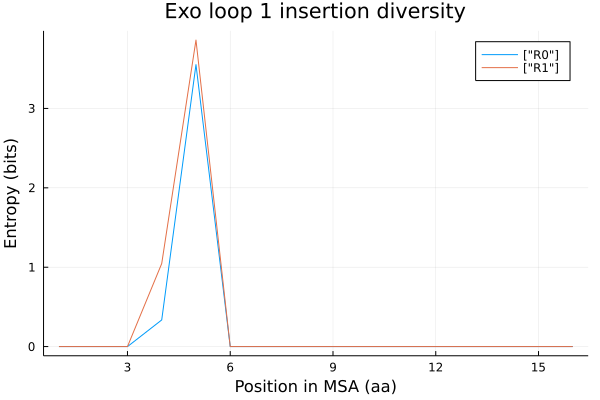

In [114]:
exo_r0_ins1 = remap_insertions(exo_InDels_R0R1, 1, "R0")
exo_r1_ins1= remap_insertions(exo_InDels_R0R1, 1, "R1")

exo_ins1_Hr0 =entropy_system(exo_r0_ins1)
exo_ins1_Hr1 =entropy_system(exo_r1_ins1)

p1 = Plots.plot(exo_ins1_Hr0, title = "Exo loop 1 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p1,exo_ins1_Hr1,label = ["R1"])


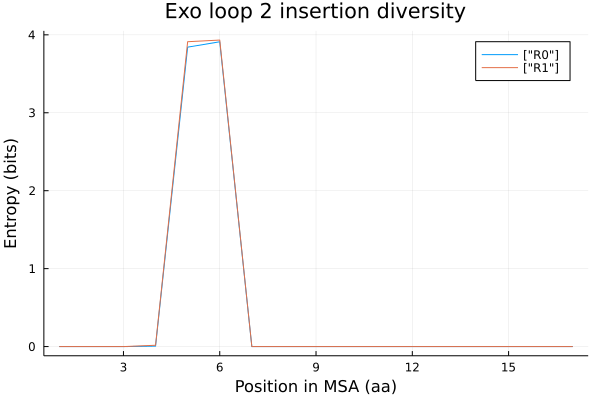

In [183]:
exo_r0_ins2 = remap_insertions(exo_InDels_R0R1, 2, "R0")
exo_r1_ins2= remap_insertions(exo_InDels_R0R1, 2, "R1")

exo_ins2_Hr0 =entropy_system(remap_insertions(exo_InDels_R0R1, 2, "R0"))
exo_ins2_Hr1 =entropy_system(remap_insertions(exo_InDels_R0R1, 2, "R1"))

p2 = Plots.plot(exo_ins2_Hr0, title = "Exo loop 2 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p2,exo_ins2_Hr1,label = ["R1"])

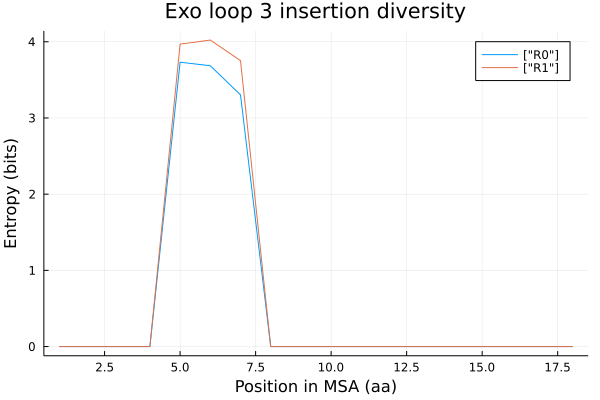

In [184]:
exo_r0_ins3 = remap_insertions(exo_InDels_R0R1, 3, "R0")
exo_r1_ins3= remap_insertions(exo_InDels_R0R1, 3, "R1")

exo_ins3_Hr0 =entropy_system(remap_insertions(exo_InDels_R0R1, 3, "R0"))
exo_ins3_Hr1 =entropy_system(remap_insertions(exo_InDels_R0R1, 3, "R1"))

p3 = Plots.plot(exo_ins3_Hr0, title = "Exo loop 3 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p3,exo_ins3_Hr1,label = ["R1"])

In [289]:
# AMINO ACID DISTRIBUTION
exo_1_dist_r0 = full_aa_dist(exo_r0_ins1, 1, "R0", 5) 
exo_1_dist_r1 = full_aa_dist(exo_r1_ins1, 1, "R1", 5) 
exo_1ins_dist = outerjoin(exo_1_dist_r0, exo_1_dist_r1, on = :aa) #16/20
CSV.write("03_Output\\exo_1ins_dist.csv", exo_1ins_dist)

exo_2_dist_r0 = full_aa_dist(exo_r0_ins2, 2, "R0", 5:6) 
exo_2_dist_r1 = full_aa_dist(exo_r1_ins2, 2, "R1", 5:6) 
exo_2ins_dist = outerjoin(exo_2_dist_r0, exo_2_dist_r1, on = :aa) #318/400
CSV.write("03_Output\\exo_2ins_dist.csv", exo_2ins_dist)

exo_3_dist_r0 = full_aa_dist(exo_r0_ins3, 3, "R0", 5:7) 
exo_3_dist_r1 = full_aa_dist(exo_r1_ins3, 3, "R1", 5:7) 
exo_3ins_dist = outerjoin(exo_3_dist_r0, exo_3_dist_r1, on = :aa) #849/8000
CSV.write("03_Output\\exo_3ins_dist.csv", exo_3ins_dist)

"03_Output\\exo_3ins_dist.csv"

In [299]:
exo_1_missing = [count(ismissing,col) for col in eachcol(outerjoin(exo_1_dist_r0, exo_1_dist_r1, aa1d, on = :aa))] #4aa missing
exo_2_missing = [count(ismissing,col) for col in eachcol(outerjoin(exo_2_dist_r0, exo_2_dist_r1, aa2d, on = :aa))] #82aa missing
exo_3_missing = [count(ismissing,col) for col in eachcol(outerjoin(exo_3_dist_r0, exo_3_dist_r1, aa3d, on = :aa))] #7151aa missing

3-element Vector{Int64}:
    0
 7151
 7151

# THUMB

### Thumb Deletions

In [170]:
#Thumb Loop Deletions
thumb_dels_gdf = combine(groupby((filter(row -> row.InDel_R0 <0, thumb_InDels_R0R1)), :InDel_R0), :Count_R0 => sum,:Count_R1 => sum, #=:Freq_R0 => sum, :Freq_R1 => sum=#) #freq is calculated for the subset not based on whole number of indels
#CSV.write("03_Output\\thumb_dels_stats.csv", thumb_dels_gdf)

"03_Output\\thumb_dels_stats.csv"

### Thumb Insertions

In [172]:
thumb_ins_gdf = combine(groupby((filter(row -> row.InDel_R0 >=0, thumb_InDels_R0R1)), :InDel_R0), :Count_R0 => sum,:Count_R1 => sum, #=:Freq_R0 => sum, :Freq_R1 => sum=#) #freq is calculated for the subset not based on whole number of indels
#CSV.write("03_Output\\thumb_ins_stats.csv", thumb_ins_gdf)

,InDel_R0,Count_R0_sum,Count_R1_sum
,Int64,Int64,Int64
1,0,176,490
2,1,90,98
3,2,397,531
4,3,6178,7937
5,9,1,2
6,10,6,6
7,11,7,7
8,12,7,5
9,13,22,12


### Thumb 1 insertion stats

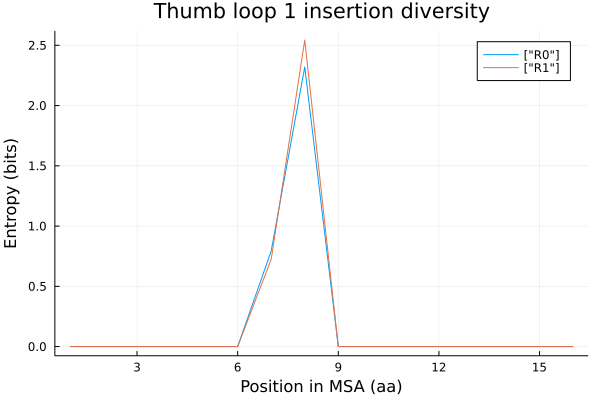

In [125]:
thumb_r0_ins1 = remap_insertions(thumb_InDels_R0R1, 1, "R0")
thumb_r1_ins1 = remap_insertions(thumb_InDels_R0R1, 1, "R1")

thumb_ins1_Hr0 =entropy_system(thumb_r0_ins1)
thumb_ins1_Hr1 =entropy_system(thumb_r1_ins1)

p_t1 = Plots.plot(thumb_ins1_Hr0, title = "Thumb loop 1 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t1,thumb_ins1_Hr1,label = ["R1"])

### Thumb 2 insertions stats

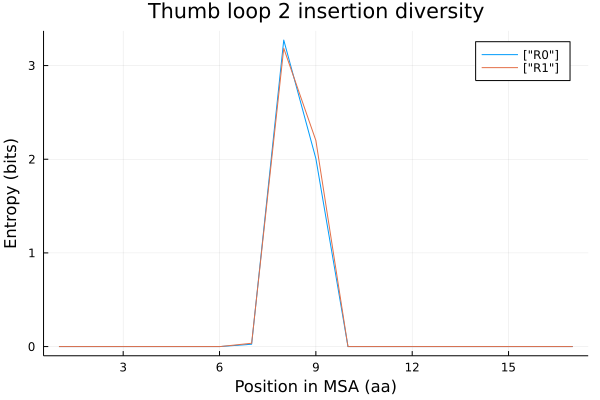

In [154]:
thumb_r0_ins2 = remap_insertions(thumb_InDels_R0R1, 2, "R0")
thumb_r1_ins2 = remap_insertions(thumb_InDels_R0R1, 2, "R1")

thumb_ins2_Hr0 =entropy_system(thumb_r0_ins2)
thumb_ins2_Hr1 =entropy_system(thumb_r1_ins2)

p_t2 = Plots.plot(thumb_ins2_Hr0, title = "Thumb loop 2 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t2,thumb_ins2_Hr1,label = ["R1"])

### Thumb 3 insertions stats

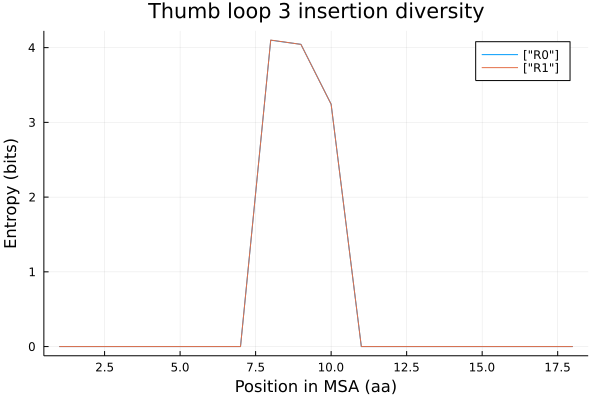

In [165]:
thumb_r0_ins3 = remap_insertions(thumb_InDels_R0R1, 3, "R0")
thumb_r1_ins3 = remap_insertions(thumb_InDels_R0R1, 3, "R1")

thumb_ins3_Hr0 =entropy_system(thumb_r0_ins3)
thumb_ins3_Hr1 =entropy_system(thumb_r1_ins3)

p_t3 = Plots.plot(thumb_ins3_Hr0, title = "Thumb loop 3 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t3,thumb_ins3_Hr1,label = ["R1"])

In [309]:
# AMINO ACID DISTRIBUTION
thumb_1_dist_r0 = full_aa_dist(thumb_r0_ins1, 1, "R0", 8) 
thumb_1_dist_r1 = full_aa_dist(thumb_r1_ins1, 1, "R1", 8) 
thumb_1ins_dist = outerjoin(thumb_1_dist_r0, thumb_1_dist_r1, on = :aa) #10/20
CSV.write("03_Output\\thumb_1ins_dist.csv", thumb_1ins_dist)

thumb_2_dist_r0 = full_aa_dist(thumb_r0_ins2, 2, "R0", 8:9) 
thumb_2_dist_r1 = full_aa_dist(thumb_r1_ins2, 2, "R1", 8:9) 
thumb_2ins_dist = outerjoin(thumb_2_dist_r0, thumb_2_dist_r1, on = :aa) #68/400
CSV.write("03_Output\\thumb_2ins_dist.csv", thumb_2ins_dist)

thumb_3_dist_r0 = full_aa_dist(thumb_r0_ins3, 3, "R0", 8:10) 
thumb_3_dist_r1 = full_aa_dist(thumb_r1_ins3, 3, "R1", 8:10) 
thumb_3ins_dist = outerjoin(thumb_3_dist_r0, thumb_3_dist_r1, on = :aa) #2014/8000
CSV.write("03_Output\\thumb_3ins_dist.csv", thumb_3ins_dist)

"03_Output\\thumb_3ins_dist.csv"

In [303]:
thumb_1_missing = [count(ismissing,col) for col in eachcol(outerjoin(thumb_1_dist_r0, thumb_1_dist_r1, aa1d, on = :aa))] #10aa missing
thumb_2_missing = [count(ismissing,col) for col in eachcol(outerjoin(thumb_2_dist_r0, thumb_2_dist_r1, aa2d, on = :aa))] #332aa missing
thumb_3_missing = [count(ismissing,col) for col in eachcol(outerjoin(thumb_3_dist_r0, thumb_3_dist_r1, aa3d, on = :aa))] #5986aa missing

3-element Vector{Int64}:
    0
 5986
 5986

### Thumb sequencing depth test

In [181]:
show(thumb_InDels_R0R1, allcols = true)

2452×10 DataFrame
  Row │ Seq                 InDel_R0  Count_R0  Freq_R0      InDel_R1  Count_R1  Freq_R1      Enrichment   EC             ETest       
      │ LongAA              Int64     Int64     Float64      Int64     Int64     Float64      Float64      Float64        Any         
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ KPKPVQVGVVLVD             -2      1933  0.0539206          -2      2821  0.0601403     0.109167      14.7841      0
    2 │ KPKPVQVGGVVLVD            -1       138  0.00384948         -1       443  0.00944422    0.897465       1.62527     0
    3 │ KPKPVQVPGGVVLVD            0       132  0.00368211          0       430  0.00916708    0.912132       1.54127     0
    4 │ KPKPVQVLVD                -5        72  0.00200842         -5       117  0.0024943     0.216657       0.045915    0.143441
    5 │ KPKPVQGGVVLVD             -2        96  0.0026779          -2     

#### P562del sampling

In [211]:
P562del = [aa"KPKPVQVGGVVLVD"]
P562del_max_EC = thumb_InDels_R0R1[thumb_InDels_R0R1.Seq .== P562del, :EC]

1-element Vector{Float64}:
 1.6252718684831307

In [228]:
function random_sets(data, percentage_depth, trials)
    sets = []
    for i in 1:trials
        #subset = sample(collect(data),depth, replace = false)
        subset = Random.randsubseq(data,percentage_depth)
        push!(sets,subset)
    end
    return sets
end

function enrichment_sets(sets_r0, sets_r1, ref_length, mut)
    enrichment_scores = []
    enrichment_ranks = []
    for i in 1:size(sets_r0)[1]
        enrich_set = indel_enrichment(sets_r0[i], sets_r1[i], ref_length)
        enrichment_score = enrich_set[enrich_set.Seq .== mut, :Enrichment]
        sort!(enrich_set,[:EC,:ETest],rev=true) #sort by EC
        rank_EC = findall(enrich_set.Seq .== mut) 
        append!(enrichment_scores, enrichment_score)
        append!(enrichment_ranks, rank_EC)
    end
    avg_score = mean(enrichment_scores)
    std_score = std(enrichment_scores)
    SE_score = std_score/sqrt(length(enrichment_scores))
    avg_rank = mean(enrichment_ranks)
    std_rank = std(enrichment_ranks)
    SE_rank = std_rank/sqrt(length(enrichment_ranks))
    return (avg_score,std_score,SE_score,avg_rank,std_rank,SE_rank)
end


function set_enrichment_stats(r0, r1, interval, trials, ref_length, var)
    percentage_scores = []
    trial_col = "Average_Enrichment_N$trials"
    for i in 1:length(interval)
        r0_sets = random_sets(r0,interval[i],trials)
        r1_sets = random_sets(r1,interval[i],trials)
        avg_scores = enrichment_sets(r0_sets,r1_sets, ref_length, var)
        push!(percentage_scores,(interval[i],avg_scores[1],avg_scores[2],avg_scores[3],avg_scores[4],avg_scores[5],avg_scores[6]))
    end
    percentage_scores = DataFrame(percentage_scores)
    rename!(percentage_scores, :1 =>:"Sequencing_Depth", :2=>trial_col, :3=>:"Enrichment_SD", :4=>:"Enrichemnt_SE", :5=>:"Rank", :6=>"Rank_SD", :7=>"Rank_SE")
    return percentage_scores
end


set_enrichment_stats (generic function with 1 method)

In [230]:
P562del_depth_analysis = set_enrichment_stats(thumb_R0aa,thumb_R1aa,[0.01:0.1:1;],5,15, P562del)
show(P562del_depth_analysis, allcols = true)
#CSV.write("03_Output\\P562del_depth_analysis.csv", P562del_depth_analysis)

10×7 DataFrame
 Row │ Sequencing_Depth  Average_Enrichment_N5  Enrichment_SD  Enrichemnt_SE  Rank     Rank_SD   Rank_SE  
     │ Float64           Float64                Float64        Float64        Float64  Float64   Float64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │             0.01               0.664973      0.400147       0.178951       3.4  0.547723  0.244949
   2 │             0.11               1.16          0.475154       0.212495       3.2  0.83666   0.374166
   3 │             0.21               0.961978      0.242713       0.108545       3.0  0.707107  0.316228
   4 │             0.31               1.03239       0.182632       0.0816755      3.0  0.707107  0.316228
   5 │             0.41               0.766987      0.111159       0.049712       3.2  0.83666   0.374166
   6 │             0.51               0.986506      0.156287       0.0698938      2.2  0.447214  0.2
   7 │             0.61          

In [534]:
depths = [0.1:0.1:1;]
push!(depths,0.01)
depths = sort(depths)
P562del_depth_analysis_N10 = set_enrichment_stats(thumb_R0aa,thumb_R1aa,depths,10,15, P562del)
P562del_depth_analysis_N10
CSV.write("03_Output\\P562del_depth_analysis_N10.csv", P562del_depth_analysis_N10)


"03_Output\\P562del_depth_analysis_N10.csv"

#### Top 10 mutants Sampling

In [257]:
#1%
r0_v01 = random_sets(thumb_R0aa, 0.01, 3)
r1_v01 = random_sets(thumb_R1aa, 0.01, 3)

s1 = indel_enrichment(r0_v01[1], r1_v01[1], 15)
s2 = indel_enrichment(r0_v01[2], r1_v01[2], 15)
s3 = indel_enrichment(r0_v01[3], r1_v01[3], 15)

sort!(s1, :EC, rev=true)
sort!(s2, :EC, rev=true)
sort!(s3, :EC, rev=true)

v1 = first(s1, 10)
v2 = first(s2, 10)
v3 = first(s3, 10)

show(v3, allcols = true)

7×10 DataFrame
 Row │ Seq                 InDel_R0  Count_R0  Freq_R0     InDel_R1  Count_R1  Freq_R1     Enrichment   EC            ETest    
     │ LongAA              Int64     Int64     Float64     Int64     Int64     Float64     Float64      Float64       Any      
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ KPKPVQVVVLVD              -3       117  0.320548          -3       144  0.327273     0.020762     0.877584     0.780559
   2 │ KPKPVQVVLVD               -4       118  0.323288          -4       143  0.325        0.00528263   0.223459     0.878772
   3 │ KPKPVQVPGGVVLVD            0         3  0.00821918         0         4  0.00909091   0.100805     0.00305106   0.947093
   4 │ KPKPVQVLGGPGGVVLVD         3         1  0.00273973         3         1  0.00227273  -0.186877    -0.000466999  0.864613
   5 │ KPKPVQVRRGPGGVVLVD         3         1  0.00273973         3         1  0.00227273  -0

In [258]:
thumb_top10_1per = outerjoin(v1,v2,v3, on=:Seq, makeunique=true)
#CSV.write("03_Output\\thumb_top10_1per.csv", thumb_top10_1per)

"03_Output\\thumb_top10_1per.csv"

In [414]:
#Different percentage depth
per = 100 #1% - 100%

r0_v01 = random_sets(thumb_R0aa, per/100, 3)
r1_v01 = random_sets(thumb_R1aa, per/100, 3)
s1 = indel_enrichment(r0_v01[1], r1_v01[1], 15)
s2 = indel_enrichment(r0_v01[2], r1_v01[2], 15)
s3 = indel_enrichment(r0_v01[3], r1_v01[3], 15)
sort!(s1, :EC, rev=true)
sort!(s2, :EC, rev=true)
sort!(s3, :EC, rev=true)
v1 = first(s1, 5)
sample = "s1"
names = ["Seq", "InDel_R0_$per"*"per_$sample", "Count_R0_$per"*"per_$sample", "Freq_R0_$per"*"per_$sample", "InDel_R1_$per"*"per_$sample", "Count_R1_$per"*"per_$sample", "Freq_R1_$per"*"per_$sample", "Enrichment_$per"*"per_$sample", "EC_$per"*"per_$sample", "ETest_$per"*"per_$sample"]
rename!(v1,names)
v2 = first(s2, 5)
sample = "s2"
names = ["Seq", "InDel_R0_$per"*"per_$sample", "Count_R0_$per"*"per_$sample", "Freq_R0_$per"*"per_$sample", "InDel_R1_$per"*"per_$sample", "Count_R1_$per"*"per_$sample", "Freq_R1_$per"*"per_$sample", "Enrichment_$per"*"per_$sample", "EC_$per"*"per_$sample", "ETest_$per"*"per_$sample"]
rename!(v2,names)
v3 = first(s3, 5)
sample = "s3"
names = ["Seq", "InDel_R0_$per"*"per_$sample", "Count_R0_$per"*"per_$sample", "Freq_R0_$per"*"per_$sample", "InDel_R1_$per"*"per_$sample", "Count_R1_$per"*"per_$sample", "Freq_R1_$per"*"per_$sample", "Enrichment_$per"*"per_$sample", "EC_$per"*"per_$sample", "ETest_$per"*"per_$sample"]
rename!(v3,names)
thumb_top10_per = outerjoin(v1,v2,v3, on=:Seq)
indel_names = ["InDel_R0_$per"*"per_s1","InDel_R0_$per"*"per_s2","InDel_R0_$per"*"per_s3","InDel_R1_$per"*"per_s1","InDel_R1_$per"*"per_s2","InDel_R1_$per"*"per_s3"]

thumb_top10_per[!,"indel_compiled_$per"] = coalesce.(thumb_top10_per[!,indel_names[1]], thumb_top10_per[!,indel_names[2]], thumb_top10_per[!,indel_names[3]], thumb_top10_per[!,indel_names[4]], thumb_top10_per[!,indel_names[5]], thumb_top10_per[!,indel_names[6]])
#show(thumb_top10_per, allcols = true)

CSV.write("03_Output\\thumb_top5_$per.csv", thumb_top10_per)



"03_Output\\thumb_top5_100.csv"

In [418]:
t1per = CSV.read("03_Output\\thumb_top5_1.csv", DataFrame)
t25per = CSV.read("03_Output\\thumb_top5_25.csv", DataFrame)
t50per = CSV.read("03_Output\\thumb_top5_50.csv", DataFrame)
t75per = CSV.read("03_Output\\thumb_top5_75.csv", DataFrame)
t100per = CSV.read("03_Output\\thumb_top5_100.csv", DataFrame)

thumb_top5_compiled = outerjoin(t1per,t25per,t50per,t75per,t100per, on=:Seq)


thumb_top5_compiled[!,"indel_compiled_all"] = coalesce.(thumb_top5_compiled.indel_compiled_1,thumb_top5_compiled.indel_compiled_25,thumb_top5_compiled.indel_compiled_50,thumb_top5_compiled.indel_compiled_75,thumb_top5_compiled.indel_compiled_100)

#show(thumb_top10_compiled, allcols = true)
CSV.write("03_Output\\thumb_top5_compiled.csv", thumb_top5_compiled)


"03_Output\\thumb_top5_compiled.csv"

# TPR2

In [174]:
#TPR2 Loop Deletions
tpr2_dels_gdf = combine(groupby((filter(row -> row.InDel_R0 <0, tpr2_InDels_R0R1)), :InDel_R0), :Count_R0 => sum,:Count_R1 => sum, #=:Freq_R0 => sum, :Freq_R1 => sum=#) #freq is calculated for the subset not based on whole number of indels
#CSV.write("03_Output\\tpr2_dels_stats.csv", tpr2_dels_gdf)

,InDel_R0,Count_R0_sum,Count_R1_sum
,Int64,Int64,Int64
1,-12,1,2
2,-9,1,2
3,-5,4,2
4,-4,9,11
5,-3,46,66
6,-2,62,91
7,-1,57712,54690


In [176]:
tpr2_ins_gdf = combine(groupby((filter(row -> row.InDel_R0 >=0, tpr2_InDels_R0R1)), :InDel_R0), :Count_R0 => sum,:Count_R1 => sum,#=:Freq_R0 => sum, :Freq_R1 => sum=#) #freq is calculated for the subset not based on whole number of indels
#CSV.write("03_Output\\tpr2_ins_stats.csv", tpr2_ins_gdf)

,InDel_R0,Count_R0_sum,Count_R1_sum
,Int64,Int64,Int64
1,0,300,904
2,1,11447,10252
3,2,23,28
4,3,4300,5377
5,7,18,17
6,9,1,2
7,11,6,4
8,12,173,139
9,13,2,2


#### TPR2 1 insertion stats

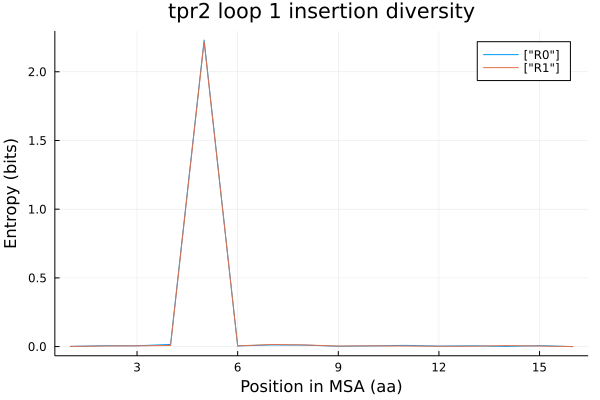

In [252]:
tpr2_r0_ins1 = remap_insertions(tpr2_InDels_R0R1, 1, "R0")
tpr2_r1_ins1 = remap_insertions(tpr2_InDels_R0R1, 1, "R1")

tpr2_ins1_Hr0 =entropy_system(tpr2_r0_ins1)
tpr2_ins1_Hr1 =entropy_system(tpr2_r1_ins1)

p_t1 = Plots.plot(tpr2_ins1_Hr0, title = "tpr2 loop 1 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t1,tpr2_ins1_Hr1,label = ["R1"])

#### TPR2 2 insertion stats

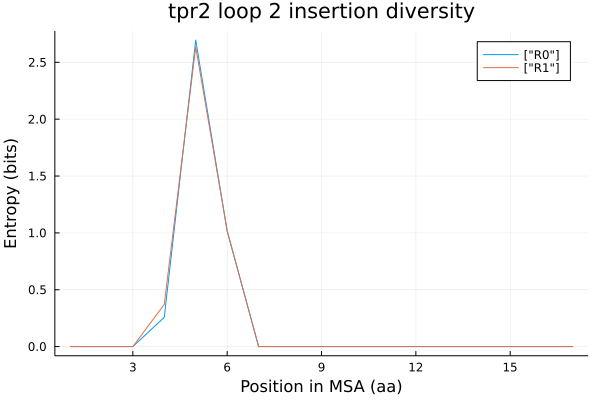

In [253]:
tpr2_r0_ins2 = remap_insertions(tpr2_InDels_R0R1, 2, "R0")
tpr2_r1_ins2 = remap_insertions(tpr2_InDels_R0R1, 2, "R1")

tpr2_ins2_Hr0 =entropy_system(tpr2_r0_ins2)
tpr2_ins2_Hr1 =entropy_system(tpr2_r1_ins2)

p_t2 = Plots.plot(tpr2_ins2_Hr0, title = "tpr2 loop 2 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t2,tpr2_ins2_Hr1,label = ["R1"])

#### TPR2 3 insertion stats

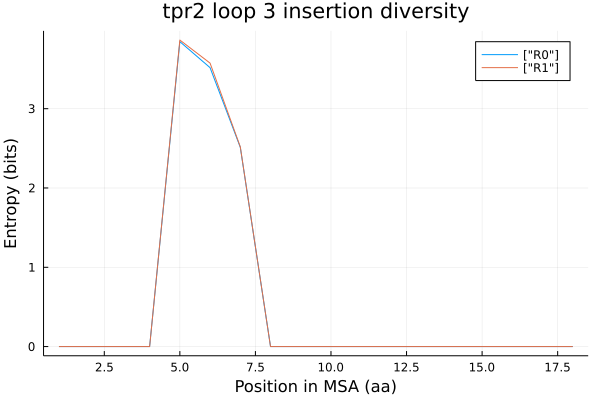

In [254]:
tpr2_r0_ins3 = remap_insertions(tpr2_InDels_R0R1, 3, "R0")
tpr2_r1_ins3 = remap_insertions(tpr2_InDels_R0R1, 3, "R1")

tpr2_ins3_Hr0 =entropy_system(tpr2_r0_ins3)
tpr2_ins3_Hr1 =entropy_system(tpr2_r1_ins3)

p_t3 = Plots.plot(tpr2_ins3_Hr0, title = "tpr2 loop 3 insertion diversity", 
            label = ["R0"], xlabel = "Position in MSA (aa)", ylabel = "Entropy (bits)")
plot!(p_t3,tpr2_ins3_Hr1,label = ["R1"])

In [310]:
# AMINO ACID DISTRIBUTION
tpr2_1_dist_r0 = full_aa_dist(tpr2_r0_ins1, 1, "R0", 5) 
tpr2_1_dist_r1 = full_aa_dist(tpr2_r1_ins1, 1, "R1", 5) 
tpr2_1ins_dist = outerjoin(tpr2_1_dist_r0, tpr2_1_dist_r1, on = :aa) #20/20
CSV.write("03_Output\\tpr2_1ins_dist.csv", tpr2_1ins_dist)

tpr2_2_dist_r0 = full_aa_dist(tpr2_r0_ins2, 2, "R0", 5:6) 
tpr2_2_dist_r1 = full_aa_dist(tpr2_r1_ins2, 2, "R1", 5:6) 
tpr2_2ins_dist = outerjoin(tpr2_2_dist_r0, tpr2_2_dist_r1, on = :aa) #11/400
CSV.write("03_Output\\tpr2_2ins_dist.csv", tpr2_2ins_dist)

tpr2_3_dist_r0 = full_aa_dist(tpr2_r0_ins3, 3, "R0", 5:7) 
tpr2_3_dist_r1 = full_aa_dist(tpr2_r1_ins3, 3, "R1", 5:7) 
tpr2_3ins_dist = outerjoin(tpr2_3_dist_r0, tpr2_3_dist_r1, on = :aa) #1035/8000
CSV.write("03_Output\\tpr2_3ins_dist.csv", tpr2_3ins_dist)

"03_Output\\tpr2_3ins_dist.csv"

In [317]:
tpr2_1_missing = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_1_dist_r0, tpr2_1_dist_r1, aa1d, on = :aa))] #0aa missing
tpr2_2_missing = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_2_dist_r0, tpr2_2_dist_r1, aa2d, on = :aa))] #389aa missing
tpr2_3_missing = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_3_dist_r0, tpr2_3_dist_r1, aa3d, on = :aa))] #6965aa missing

3-element Vector{Int64}:
    0
 6965
 6965

# Repetition of amino acid distribution quantification on R0 and R1 datasets independently

In [6]:
function remap_insertions_I(dataframe, insertion_size)
    ins = filter(row -> row.InDel ==insertion_size, dataframe)
    ins_r = []
    for i in 1:size(ins)[1]
        rep = repeat([String(ins[i,:Seq])], ins[i,:Count])
        append!(ins_r,rep)
    end
    return ins_r
end

remap_insertions_I (generic function with 1 method)

# Exo

In [ ]:
#### Overal InDel counts

exo_r0_I = indel_classification(exo_R0aa, 15)
exo_r1_I = indel_classification(exo_R1aa, 15)

#Exo Loop Deletions R0
exo_dels_r0 = (filter(row -> row.InDel <0, exo_r0_I))
exo_dels_gdf_r0 = groupby(exo_dels_r0, :InDel)
exo_dels_gdf_r0_sum = combine(exo_dels_gdf_r0, :Count => sum)

#Exo Loop Deletions R1
exo_dels_r1 = (filter(row -> row.InDel <0, exo_r1_I))
exo_dels_gdf_r1 = groupby(exo_dels_r1, :InDel)
exo_dels_gdf_r1_sum = combine(exo_dels_gdf_r1, :Count => sum)

exo_dels_gdf_sum_I = outerjoin(exo_dels_gdf_r0_sum,exo_dels_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\exo_dels_IND_stats.csv", exo_dels_gdf_sum_I)

#Exo Loop Insertions R0
exo_ins_r0 = (filter(row -> row.InDel >=0, exo_r0_I))
exo_ins_gdf_r0 = groupby(exo_ins_r0, :InDel)
exo_ins_gdf_r0_sum = combine(exo_ins_gdf_r0, :Count => sum)

#Exo Loop Insertions R1
exo_ins_r1 = (filter(row -> row.InDel >=0, exo_r1_I))
exo_ins_gdf_r1 = groupby(exo_ins_r1, :InDel)
exo_ins_gdf_r1_sum = combine(exo_ins_gdf_r1, :Count => sum)

exo_ins_gdf_sum_I = outerjoin(exo_ins_gdf_r0_sum,exo_ins_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\exo_ins_IND_stats.csv", exo_ins_gdf_sum_I)

In [367]:
### Amino acid distributions

exo_r0_I = indel_classification(exo_R0aa, 15)
exo_r1_I = indel_classification(exo_R1aa, 15)
exo_r0_I_1ins = remap_insertions_I(exo_r0_I, 1)
exo_r1_I_1ins = remap_insertions_I(exo_r1_I, 1)
exo_r0_I_2ins = remap_insertions_I(exo_r0_I, 2)
exo_r1_I_2ins = remap_insertions_I(exo_r1_I, 2)
exo_r0_I_3ins = remap_insertions_I(exo_r0_I, 3)
exo_r1_I_3ins = remap_insertions_I(exo_r1_I, 3)

exo_r0_I_1ins_dist = full_aa_dist(exo_r0_I_1ins, 1, "R0", 5) #20/20
EX1 = size(exo_r0_I_1ins_dist)[1]
exo_r1_I_1ins_dist = full_aa_dist(exo_r1_I_1ins, 1, "R1", 5)  #16/20
EX2 = size(exo_r1_I_1ins_dist)[1]
exo_1ins_I_dist = outerjoin(exo_r0_I_1ins_dist, exo_r1_I_1ins_dist , on = :aa)
CSV.write("03_Output\\exo_1ins_dist_IND.csv", exo_1ins_I_dist)
exo_1ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(exo_r0_I_1ins_dist, exo_r1_I_1ins_dist, aa1d, on = :aa))] #R0 - 0/20 missing ; R1 - 4/20 missing

exo_r0_I_2ins_dist = full_aa_dist(exo_r0_I_2ins, 1, "R0", 5:6) #393/400
EX3 = size(exo_r0_I_2ins_dist)[1]
exo_r1_I_2ins_dist = full_aa_dist(exo_r1_I_2ins, 1, "R1", 5:6) #321/400
EX4 = size(exo_r1_I_2ins_dist)[1]
exo_2ins_I_dist = outerjoin(exo_r0_I_2ins_dist, exo_r1_I_2ins_dist , on = :aa)
CSV.write("03_Output\\exo_2ins_dist_IND.csv", exo_2ins_I_dist)
exo_2ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(exo_r0_I_2ins_dist, exo_r1_I_2ins_dist, aa2d, on = :aa))] #R0 - 7/400 missing ; R1 - 79/400 missing

exo_r0_I_3ins_dist = full_aa_dist(exo_r0_I_3ins, 1, "R0", 5:7) #4153/8000
EX5 = size(exo_r0_I_3ins_dist)[1]
exo_r1_I_3ins_dist = full_aa_dist(exo_r1_I_3ins, 1, "R1", 5:7) #1061/8000
EX6 = size(exo_r1_I_3ins_dist)[1]
exo_3ins_I_dist = outerjoin(exo_r0_I_3ins_dist, exo_r1_I_3ins_dist , on = :aa)
CSV.write("03_Output\\exo_3ins_dist_IND.csv", exo_3ins_I_dist)
exo_3ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(exo_r0_I_3ins_dist, exo_r1_I_3ins_dist, aa3d, on = :aa))] #R0 - 3847/8000 missing ; R1 - 6939/8000 missing

println("R0_ins1=",EX1,"/20aa ","R1_ins1=",EX2,"/20aa ","R0_ins2=",EX3,"/400aa ","R1_ins2=",EX4,"/400aa ","R0_ins3=",EX5,"/8000aa ","R1_ins3=",EX6,"/8000aa ")

R0_ins1=20/20aa R1_ins1=16/20aa R0_ins2=393/400aa R1_ins2=321/400aa R0_ins3=4153/8000aa R1_ins3=1061/8000aa 


# TPR2

In [27]:
#### Overal InDel counts

tpr2_r0_I = indel_classification(tpr2_R0aa, 15)
tpr2_r1_I = indel_classification(tpr2_R1aa, 15)

#tpr2 Loop Deletions R0
tpr2_dels_r0 = (filter(row -> row.InDel <0, tpr2_r0_I))
tpr2_dels_gdf_r0 = groupby(tpr2_dels_r0, :InDel)
tpr2_dels_gdf_r0_sum = combine(tpr2_dels_gdf_r0, :Count => sum)

#tpr2 Loop Deletions R1
tpr2_dels_r1 = (filter(row -> row.InDel <0, tpr2_r1_I))
tpr2_dels_gdf_r1 = groupby(tpr2_dels_r1, :InDel)
tpr2_dels_gdf_r1_sum = combine(tpr2_dels_gdf_r1, :Count => sum)

tpr2_dels_gdf_sum_I = outerjoin(tpr2_dels_gdf_r0_sum,tpr2_dels_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\tpr2_dels_IND_stats.csv", tpr2_dels_gdf_sum_I)

#tpr2 Loop Insertions R0
tpr2_ins_r0 = (filter(row -> row.InDel >=0, tpr2_r0_I))
tpr2_ins_gdf_r0 = groupby(tpr2_ins_r0, :InDel)
tpr2_ins_gdf_r0_sum = combine(tpr2_ins_gdf_r0, :Count => sum)

#tpr2 Loop Insertions R1
tpr2_ins_r1 = (filter(row -> row.InDel >=0, tpr2_r1_I))
tpr2_ins_gdf_r1 = groupby(tpr2_ins_r1, :InDel)
tpr2_ins_gdf_r1_sum = combine(tpr2_ins_gdf_r1, :Count => sum)

tpr2_ins_gdf_sum_I = outerjoin(tpr2_ins_gdf_r0_sum,tpr2_ins_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\tpr2_ins_IND_stats.csv", tpr2_ins_gdf_sum_I)

"03_Output\\tpr2_ins_IND_stats.csv"

In [368]:
### Amino acid distributions

tpr2_r0_I = indel_classification(tpr2_R0aa, 15)
tpr2_r1_I = indel_classification(tpr2_R1aa, 15)
tpr2_r0_I_1ins = remap_insertions_I(tpr2_r0_I, 1)
tpr2_r1_I_1ins = remap_insertions_I(tpr2_r1_I, 1)
tpr2_r0_I_2ins = remap_insertions_I(tpr2_r0_I, 2)
tpr2_r1_I_2ins = remap_insertions_I(tpr2_r1_I, 2)
tpr2_r0_I_3ins = remap_insertions_I(tpr2_r0_I, 3)
tpr2_r1_I_3ins = remap_insertions_I(tpr2_r1_I, 3)

tpr2_r0_I_1ins_dist = full_aa_dist(tpr2_r0_I_1ins, 1, "R0", 5) #20/20
TP1 = size(tpr2_r0_I_1ins_dist)[1]
tpr2_r1_I_1ins_dist = full_aa_dist(tpr2_r1_I_1ins, 1, "R1", 5)  #20/20
TP2 = size(tpr2_r1_I_1ins_dist)[1]
tpr2_1ins_I_dist = outerjoin(tpr2_r0_I_1ins_dist, tpr2_r1_I_1ins_dist , on = :aa)
CSV.write("03_Output\\tpr2_1ins_dist_IND.csv", tpr2_1ins_I_dist)
tpr2_1ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_r0_I_1ins_dist, tpr2_r1_I_1ins_dist, aa1d, on = :aa))] #R0 - 0/20 missing ; R1 - 0/20 missing

tpr2_r0_I_2ins_dist = full_aa_dist(tpr2_r0_I_2ins, 1, "R0", 5:6) #54/400
TP3 = size(tpr2_r0_I_2ins_dist)[1]
tpr2_r1_I_2ins_dist = full_aa_dist(tpr2_r1_I_2ins, 1, "R1", 5:6) #40/400
TP4 = size(tpr2_r1_I_2ins_dist)[1]
tpr2_2ins_I_dist = outerjoin(tpr2_r0_I_2ins_dist, tpr2_r1_I_2ins_dist , on = :aa)
CSV.write("03_Output\\tpr2_2ins_dist_IND.csv", tpr2_2ins_I_dist)
tpr2_2ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_r0_I_2ins_dist, tpr2_r1_I_2ins_dist, aa2d, on = :aa))] #R0 - 346/400 missing ; R1 - 360/400 missing

tpr2_r0_I_3ins_dist = full_aa_dist(tpr2_r0_I_3ins, 1, "R0", 5:7) #1775/8000
TP5 = size(tpr2_r0_I_3ins_dist)[1]
tpr2_r1_I_3ins_dist = full_aa_dist(tpr2_r1_I_3ins, 1, "R1", 5:7) #1733/8000
TP6 = size(tpr2_r1_I_3ins_dist)[1]
tpr2_3ins_I_dist = outerjoin(tpr2_r0_I_3ins_dist, tpr2_r1_I_3ins_dist , on = :aa)
CSV.write("03_Output\\tpr2_3ins_dist_IND.csv", tpr2_3ins_I_dist)
tpr2_3ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(tpr2_r0_I_3ins_dist, tpr2_r1_I_3ins_dist, aa3d, on = :aa))] #R0 - 6225/8000 missing ; R1 - 6267/8000 missing

println("R0_ins1=",TP1,"/20aa ","R1_ins1=",TP2,"/20aa ","R0_ins2=",TP3,"/400aa ","R1_ins2=",TP4,"/400aa ","R0_ins3=",TP5,"/8000aa ","R1_ins3=",TP6,"/8000aa ")

R0_ins1=20/20aa R1_ins1=20/20aa R0_ins2=54/400aa R1_ins2=40/400aa R0_ins3=1775/8000aa R1_ins3=1733/8000aa 


# Thumb

In [28]:
#### Overal InDel counts

thumb_r0_I = indel_classification(thumb_R0aa, 15)
thumb_r1_I = indel_classification(thumb_R1aa, 15)

#thumb Loop Deletions R0
thumb_dels_r0 = (filter(row -> row.InDel <0, thumb_r0_I))
thumb_dels_gdf_r0 = groupby(thumb_dels_r0, :InDel)
thumb_dels_gdf_r0_sum = combine(thumb_dels_gdf_r0, :Count => sum)

#thumb Loop Deletions R1
thumb_dels_r1 = (filter(row -> row.InDel <0, thumb_r1_I))
thumb_dels_gdf_r1 = groupby(thumb_dels_r1, :InDel)
thumb_dels_gdf_r1_sum = combine(thumb_dels_gdf_r1, :Count => sum)

thumb_dels_gdf_sum_I = outerjoin(thumb_dels_gdf_r0_sum,thumb_dels_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\thumb_dels_IND_stats.csv", thumb_dels_gdf_sum_I)

#thumb Loop Insertions R0
thumb_ins_r0 = (filter(row -> row.InDel >=0, thumb_r0_I))
thumb_ins_gdf_r0 = groupby(thumb_ins_r0, :InDel)
thumb_ins_gdf_r0_sum = combine(thumb_ins_gdf_r0, :Count => sum)

#thumb Loop Insertions R1
thumb_ins_r1 = (filter(row -> row.InDel >=0, thumb_r1_I))
thumb_ins_gdf_r1 = groupby(thumb_ins_r1, :InDel)
thumb_ins_gdf_r1_sum = combine(thumb_ins_gdf_r1, :Count => sum)

thumb_ins_gdf_sum_I = outerjoin(thumb_ins_gdf_r0_sum,thumb_ins_gdf_r1_sum, on = :InDel, makeunique=true)

CSV.write("03_Output\\thumb_ins_IND_stats.csv", thumb_ins_gdf_sum_I)

"03_Output\\thumb_ins_IND_stats.csv"

In [372]:
### Amino acid distributions

thumb_r0_I = indel_classification(thumb_R0aa, 15)
thumb_r1_I = indel_classification(thumb_R1aa, 15)
thumb_r0_I_1ins = remap_insertions_I(thumb_r0_I, 1)
thumb_r1_I_1ins = remap_insertions_I(thumb_r1_I, 1)
thumb_r0_I_2ins = remap_insertions_I(thumb_r0_I, 2)
thumb_r1_I_2ins = remap_insertions_I(thumb_r1_I, 2)
thumb_r0_I_3ins = remap_insertions_I(thumb_r0_I, 3)
thumb_r1_I_3ins = remap_insertions_I(thumb_r1_I, 3)

thumb_r0_I_1ins_dist = full_aa_dist(thumb_r0_I_1ins, 1, "R0", 8) #13/20
TH1 = size(thumb_r0_I_1ins_dist)[1]
thumb_r1_I_1ins_dist = full_aa_dist(thumb_r1_I_1ins, 1, "R1", 8)  #14/20
TH2 = size(thumb_r1_I_1ins_dist)[1]
thumb_1ins_I_dist = outerjoin(thumb_r0_I_1ins_dist, thumb_r1_I_1ins_dist , on = :aa)
CSV.write("03_Output\\thumb_1ins_dist_IND.csv", thumb_1ins_I_dist)
thumb_1ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(thumb_r0_I_1ins_dist, thumb_r1_I_1ins_dist, aa1d, on = :aa))] #R0 - 7/20 missing ; R1 - 6/20 missing

thumb_r0_I_2ins_dist = full_aa_dist(thumb_r0_I_2ins, 1, "R0", 8:9) #116/400
TH3 = size(thumb_r0_I_2ins_dist)[1]
thumb_r1_I_2ins_dist = full_aa_dist(thumb_r1_I_2ins, 1, "R1", 8:9) #114/400
TH4 = size(thumb_r1_I_2ins_dist)[1]
thumb_2ins_I_dist = outerjoin(thumb_r0_I_2ins_dist, thumb_r1_I_2ins_dist , on = :aa)
CSV.write("03_Output\\thumb_2ins_dist_IND.csv", thumb_2ins_I_dist)
thumb_2ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(thumb_r0_I_2ins_dist, thumb_r1_I_2ins_dist, aa2d, on = :aa))] #R0 - 284/400 missing ; R1 - 286/400 missing

thumb_r0_I_3ins_dist = full_aa_dist(thumb_r0_I_3ins, 1, "R0", 8:10) #3148/8000
TH5 = size(thumb_r0_I_3ins_dist)[1]
thumb_r1_I_3ins_dist = full_aa_dist(thumb_r1_I_3ins, 1, "R1", 8:10) #3250/8000
TH6 = size(thumb_r1_I_3ins_dist)[1]
thumb_3ins_I_dist = outerjoin(thumb_r0_I_3ins_dist, thumb_r1_I_3ins_dist , on = :aa)
CSV.write("03_Output\\thumb_3ins_dist_IND.csv", thumb_3ins_I_dist)
thumb_3ins_missing_I = [count(ismissing,col) for col in eachcol(outerjoin(thumb_r0_I_3ins_dist, thumb_r1_I_3ins_dist, aa3d, on = :aa))] #R0 - 4852/8000 missing ; R1 - 4750/8000 missing

println("R0_ins1=",TH1,"/20aa ","R1_ins1=",TH2,"/20aa ","R0_ins2=",TH3,"/400aa ","R1_ins2=",TH4,"/400aa ","R0_ins3=",TH5,"/8000aa ","R1_ins3=",TH6,"/8000aa ")

R0_ins1=13/20aa R1_ins1=14/20aa R0_ins2=116/400aa R1_ins2=114/400aa R0_ins3=3148/8000aa R1_ins3=3250/8000aa 
